## EDA - 02 - Subscribers
- 조회수와 구독자수의 관계

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

%matplotlib inline

### Data Load

In [2]:
train = pd.read_csv("train.csv")
train.columns = ['dislike', 'category', 'comments', 'like', 'play_time',
       'subscribers', 'tag', 'title', 'top_comment', 'upload_date', 'url',
       'views', 'crawl_date']

print(train.shape)
train.head(3)

(5177, 13)


,dislike,category,comments,like,play_time,subscribers,tag,title,top_comment,upload_date,url,views,crawl_date
0,277,게임,"댓글 4,919개",1.3만,0:14,151만,"['마인크래프트', 'Minecraft', '샌드박스 네트워크', '샌드박스', '...",마크판 거지키우기 업그레이드 *크리에이터* 키우기! - 마인크래프트 - [잠뜰],그동안 여러분이 잠뜰TV에서 가장 재밌게 본 영상은?!\n댓글에 많이 남겨주시고 좋...,게시일: 2018. 8. 17.,https://www.youtube.com/watch?v=azoDJNPRU7s&li...,"조회수 579,949회",2018.08.23
1,278,게임,"댓글 4,964개",8.7천,0:15,236만,"['도티', '도티 마피아', '도티 머더', '마피아 머더', 'mafia', '...","직업 머더 ""곤충""능력 특집 (부제: 파브르와 저승벌레 팡수)",다음 컨셉은 아이스 크림 어떨까요?예를 들면스크류바:술래가 한 대 치면 술래를 5초...,게시일: 2018. 8. 20.,https://www.youtube.com/watch?v=-BnUuHgUK5Q&li...,"조회수 451,676회",2018.08.23
2,561,게임,"댓글 5,262개",2.3만,6:47,246만,"['보겸', '보겸TV', 'bokyem', '도티', '롤', '오버워치', '원...",14번의”아디오스” ㄷ1지고싶으면 들이대봐 드루와,모듀 ㅂㅇㄹ ^_^* \nㅋㅋㅋ 역대 최대킬 ㅋㅋㅋ\n고마워 ^_^+ 가조쿠들 ㅋㅋ...,게시일: 2018. 8. 18.,https://www.youtube.com/watch?v=v0rDCGLcnpU&li...,"조회수 955,578회",2018.08.23


### Upload_date
- 게시년, 월, 일

In [3]:
ls=list(train["upload_date"])

In [4]:
del_list = []
for i, s in enumerate(ls):
    if "시간시간" in s:
        print(s)
        del_list.append(i)
del_list

실시간 스트림: 14시간시간 전
실시간 스트림: 10시간시간 전
실시간 스트림: 12시간시간 전


[3275, 3331, 3345]

In [5]:
train = train.drop(del_list)
train.shape

(5174, 13)

In [6]:
train = train.reset_index(drop=True)

In [7]:
s = '게시일: 2014. 2. 26.'

In [8]:
s[5:-1].replace(" ","").split(".")

['2014', '2', '26']

In [9]:
def upload_date_clear_year(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[0])
    else:
        return int(date[5:-1].replace(" ","").split(".")[0])

def upload_date_clear_month(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[1])
    else:
        return int(date[5:-1].replace(" ","").split(".")[1])

def upload_date_clear_day(date):
    if len(date) > 20:
        return int(date[14:-1].replace(" ","").split(".")[2])
    else:
        return int(date[5:-1].replace(" ","").split(".")[2])

In [10]:
train["upload_date_year"] = train["upload_date"].apply(upload_date_clear_year)
train["upload_date_month"] = train["upload_date"].apply(upload_date_clear_month)
train["upload_date_day"] = train["upload_date"].apply(upload_date_clear_day)

In [11]:
train[["upload_date_year", "upload_date_month", "upload_date_day"]].head()

,upload_date_year,upload_date_month,upload_date_day
0,2018,8,17
1,2018,8,20
2,2018,8,18
3,2018,8,18
4,2018,8,21


### Crawl_date

In [12]:
s = '2014.2.26'

In [13]:
int(s.split(".")[0])

2014

In [14]:
def crawl_data_clear_year(date):
    return int(date.split(".")[0])

def crawl_data_clear_month(date):
    return int(date.split(".")[1])

def crawl_data_clear_day(date):
    return int(date.split(".")[2])

In [15]:
train["crawl_date_year"] = train["crawl_date"].apply(crawl_data_clear_year)
train["crawl_date_month"] = train["crawl_date"].apply(crawl_data_clear_month)
train["crawl_date_day"] = train["crawl_date"].apply(crawl_data_clear_day)

In [16]:
train[["crawl_date_year", "crawl_date_month", "crawl_date_day"]].head()

,crawl_date_year,crawl_date_month,crawl_date_day
0,2018,8,23
1,2018,8,23
2,2018,8,23
3,2018,8,23
4,2018,8,23


### Uploaded days

In [17]:
from datetime import date

for idx in tqdm(range(0, len(train))):
    d0 = date(train["upload_date_year"].loc[idx], train["upload_date_month"].loc[idx], train["upload_date_day"].loc[idx])
    d1 = date(train["crawl_date_year"].loc[idx], train["crawl_date_month"].loc[idx], train["crawl_date_day"].loc[idx])
    train.loc[idx, "uploaded_days"] = (d1 - d0).days

100%|██████████| 5174/5174 [00:04<00:00, 1245.97it/s]


In [18]:
train[["uploaded_days"]].head()

,uploaded_days
0,6.0
1,3.0
2,5.0
3,5.0
4,2.0


### Views
- 조회수 ( 일평균 조회수를 target 값으로 사용 )
- 예측할 target

In [19]:
def views_clear(view):
    if view == '조회수 없음':
        return 0
    else:
        return int(view[4:-1].replace(",",""))

In [20]:
train["views"] = train["views"].apply(views_clear)

In [21]:
train["views"].head()

0    579949
1    451676
2    955578
3    191211
4    162253
Name: views, dtype: int64

In [22]:
train["views"] = train["views"] / train["uploaded_days"]

In [23]:
train["views"].head()

0     96658.166667
1    150558.666667
2    191115.600000
3     38242.200000
4     81126.500000
Name: views, dtype: float64

### Subscribers
- 구독자 수

In [24]:
def subscriber_clear(s):
    '''
    천, 만으로 표시된 값 숫자로 변경
    '''
    if s[-1] == '천':
        return float(s[:-1]) * 1000
    elif s[-1] == '만':
        return float(s[:-1]) * 10000
    else:
        return float(s)

In [25]:
train["subscribers"] = train["subscribers"].apply(subscriber_clear)

In [26]:
train["subscribers"].head()

0    1510000.0
1    2360000.0
2    2460000.0
3     230000.0
4     470000.0
Name: subscribers, dtype: float64

### 구독자수 분포(distrbution of subscribers)

In [27]:
train["subscribers"].value_counts().head(10)

0.0           1450
12600000.0     258
780000.0       189
19000.0        163
15410000.0     103
50000.0         73
5040000.0       52
1250000.0       50
2720000.0       48
9850000.0       47
Name: subscribers, dtype: int64

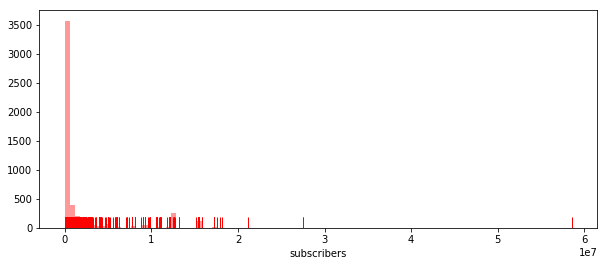

In [28]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.distplot(train["subscribers"], kde=False, bins=100, color='red', ax=ax, rug=True)

### Correlation between views and subscribers

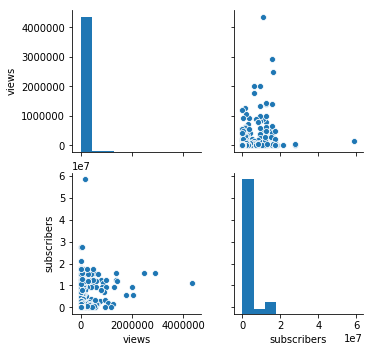

In [29]:
sns.pairplot(train[["views", "subscribers"]])

In [30]:
train[["views", "subscribers"]].corr()

,views,subscribers
views,1.000000,0.206424
subscribers,0.206424,1.000000


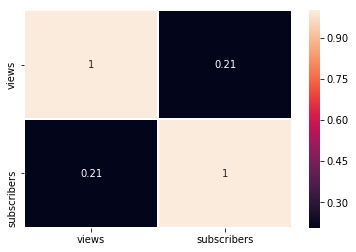

In [31]:
sns.heatmap(train[["views", "subscribers"]].corr(), linewidths=.5, annot=True)

In [32]:
import statsmodels.api as sm
scale_model = sm.OLS.from_formula("views ~ "
                            "scale(subscribers)", data=train)
result = scale_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     230.2
Date:                Mon, 27 Aug 2018   Prob (F-statistic):           6.66e-51
Time:                        22:01:59   Log-Likelihood:                -67805.
No. Observations:                5174   AIC:                         1.356e+05
Df Residuals:                    5172   BIC:                         1.356e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.178e+04   1653

#### 구독자 수는 단독으로 조회수와의 상관관계를 설명하기에는 많이 부족하다.